In [4]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = pd.Series(iris_data.target, dtype='category')

# データの記述・要約

## 3.1.1 要約統計量の算出

In [78]:
iris.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [45]:
iris['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [79]:
iris['species'].value_counts(normalize=True).round(2)

2    0.33
1    0.33
0    0.33
Name: species, dtype: float64

- 欠損値が含まれている場合の処理は??

## 3.1.2 データ項目間の関係の理解

In [80]:
iris.corr().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.11,0.87,0.82
sepal width (cm),-0.11,1.00,-0.42,-0.36
petal length (cm),0.87,-0.42,1.00,0.96
petal width (cm),0.82,-0.36,0.96,1.00


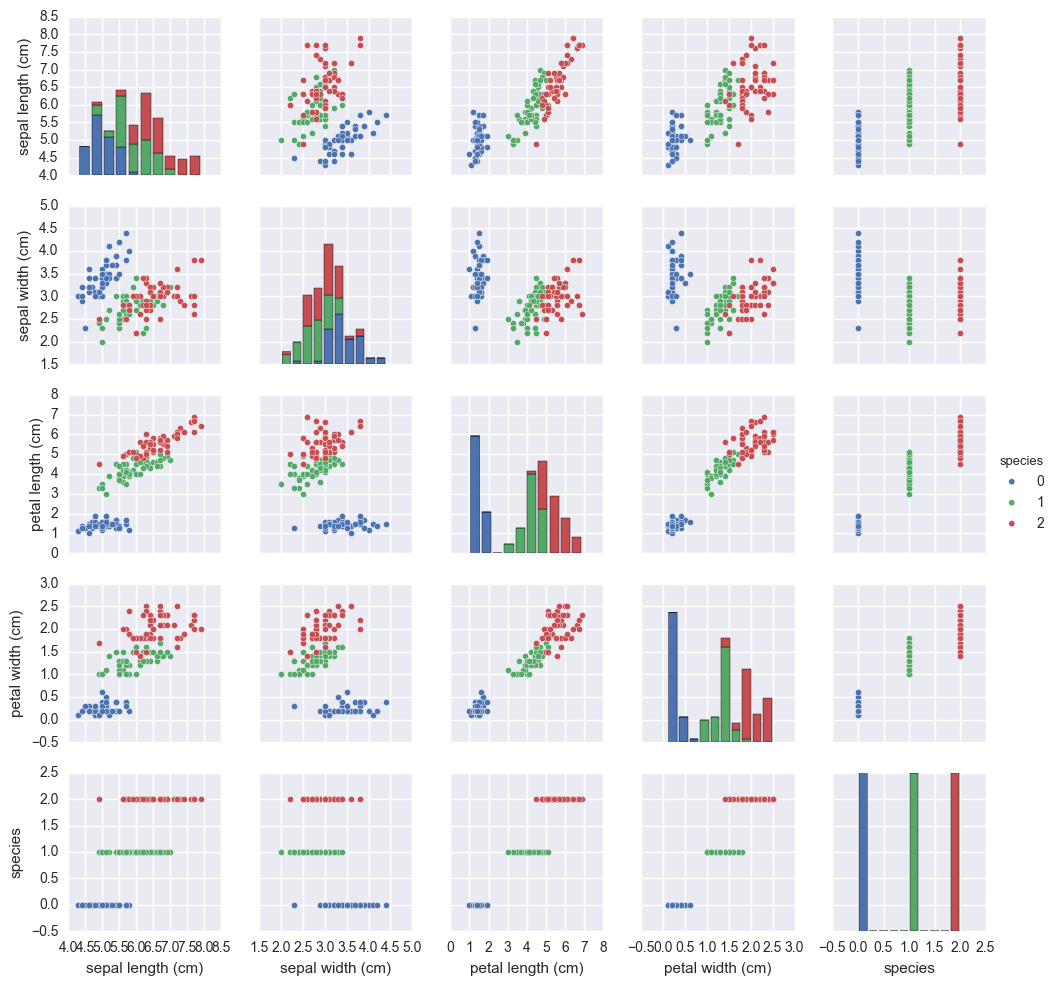

In [68]:
sns.pairplot(iris, hue='species', size=2)
plt.show()

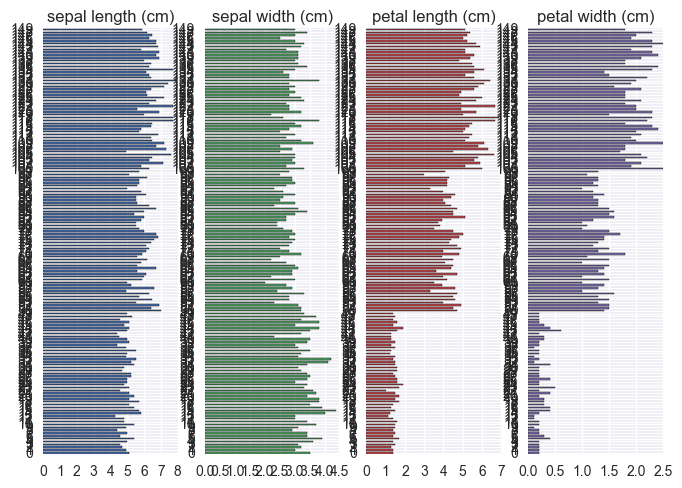

In [77]:
iris.plot.barh(layout=(1, 4), subplots=True, sharex=False, legend=False)
plt.show()

# 3.2 欠損値への対応

## 3.2.1 欠損値が発生するメカニズム

In [5]:
nhanes = pd.read_csv('./pandas_usage/nhanes.csv', sep=',', index_col=0)

In [129]:
missing = nhanes.apply(pd.isnull, axis=0)
missing['count'] = 1
missing.groupby(nhanes.columns.values.tolist()).sum()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th>count</th>
    </tr>
    <tr>
      <th>age</th>
      <th>bmi</th>
      <th>hyp</th>
      <th>chl</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">False</th>
      <th rowspan="2" valign="top">False</th>
      <th rowspan="2" valign="top">False</th>
      <th>False</th>
      <td>13</td>
    </tr>
    <tr>
      <th>True</th>
      <td>3</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">True</th>
      <th>False</th>
      <th>False</th>
      <td>1</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">True</th>
      <th>False</th>
      <td>1</td>
    </tr>
    <tr>
      <th>True</th>
      <td>7</td>
    </tr>
  </tbody>
</table>
</div>

In [130]:
missing.sum()

age       0.0
bmi       9.0
hyp       8.0
chl      10.0
count    25.0
dtype: float64

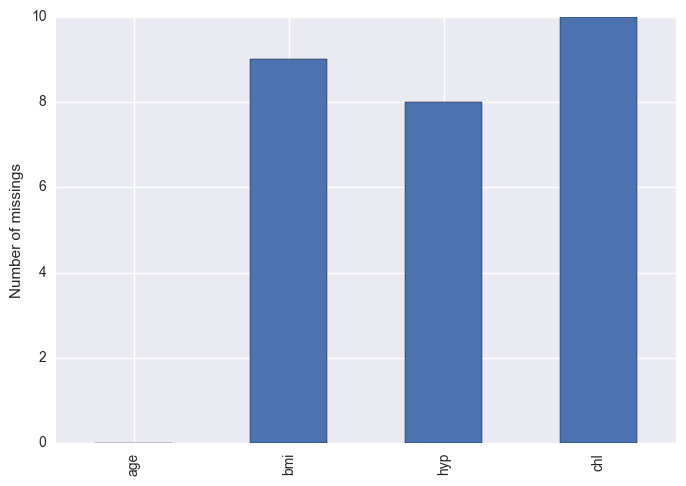

In [133]:
missing[nhanes.columns.values.tolist()].sum().plot.bar()
plt.ylabel('Number of missings')
plt.show()

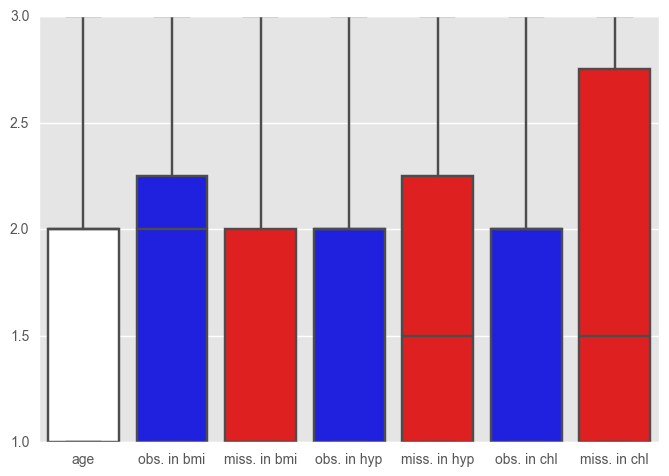

In [181]:
ages = pd.DataFrame()
ages['age'] = nhanes['age']
ages['obs. in bmi'] = nhanes[pd.notnull(nhanes['bmi'])]['age']
ages['miss. in bmi'] = nhanes[pd.isnull(nhanes['bmi'])]['age']
ages['obs. in hyp'] = nhanes[pd.notnull(nhanes['hyp'])]['age']
ages['miss. in hyp'] = nhanes[pd.isnull(nhanes['hyp'])]['age']
ages['obs. in chl'] = nhanes[pd.notnull(nhanes['chl'])]['age']
ages['miss. in chl'] = nhanes[pd.isnull(nhanes['chl'])]['age']
sns.boxplot(data=ages, palette=('w', 'b', 'r', 'b', 'r', 'b', 'r'))
plt.show()

## 3.2.4 リストワイズ法

In [186]:
print(nhanes.dropna().shape)
nhanes.dropna().head()

(13, 4)


,age,bmi,hyp,chl
2,2,22.7,1.0,187.0
5,1,20.4,1.0,113.0
7,1,22.5,1.0,118.0
8,1,30.1,1.0,187.0
9,2,22.0,1.0,238.0


## ペアワイズ法

In [195]:
nhanes.dropna(subset=['bmi', 'hyp'])

,age,bmi,hyp,chl
2,2,22.7,1.0,187.0
5,1,20.4,1.0,113.0
7,1,22.5,1.0,118.0
8,1,30.1,1.0,187.0
9,2,22.0,1.0,238.0
13,3,21.7,1.0,206.0
14,2,28.7,2.0,204.0
15,1,29.6,1.0,NaN
17,3,27.2,2.0,284.0
18,2,26.3,2.0,199.0


In [194]:
nhanes.cov()

,age,bmi,hyp,chl
age,0.690000,-1.307500,0.183824,18.328571
bmi,-1.307500,17.767833,0.096667,83.687179
hyp,0.183824,0.096667,0.191176,8.554945
chl,18.328571,83.687179,8.554945,2044.400000


In [197]:
nhanes.corr()

,age,bmi,hyp,chl
age,1.000000,-0.371853,0.505696,0.507461
bmi,-0.371853,1.000000,0.051280,0.373459
hyp,0.505696,0.051280,1.000000,0.428614
chl,0.507461,0.373459,0.428614,1.000000


## 3.2.6 平均値代入法

In [206]:
nhanes_mean = nhanes.copy()
nhanes_mean['bmi'] = nhanes_mean['bmi'].fillna(nhanes_mean['bmi'].mean())
nhanes_mean['hyp'] = nhanes_mean['hyp'].fillna(nhanes_mean['hyp'].mean())
nhanes_mean['chl'] = nhanes_mean['chl'].fillna(nhanes_mean['chl'].mean())

## 3.2.7 回帰代入法

In [6]:
import sklearn.linear_model as lm
reg = lm.LinearRegression()
nhanes_listwise = nhanes.dropna()
nhanes_reg = nhanes.copy()
reg.fit(nhanes_listwise[['age', 'hyp', 'chl']], nhanes_listwise['bmi'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)